In [1]:
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *

In [2]:
def kernel(point, xmat, k):
    m, n = shape(xmat)
    weights = mat(eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = exp(diff * diff.T / (-2.0 * k ** 2))
    return weights

In [3]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (X.T * (wei * X)).I * (X.T * (wei * ymat.T))
    return W

In [4]:

def localWeightRegression(xmat, ymat, k):
    m, n = shape(xmat)
    ypred = zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred

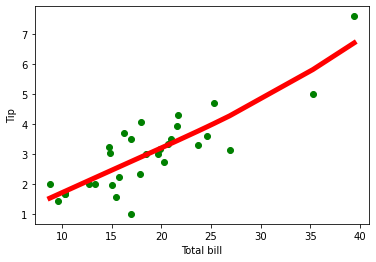

In [6]:
data = pd.read_csv("tips.csv")
bill = array(data.total_bill)
tip = array(data.tip)
mbill = mat(bill)
mtip = mat(tip)
m = shape(mbill)[1]
one = mat(ones(m))
X = hstack((one.T, mbill.T))
# set k here
ypred = localWeightRegression(X, mtip, 10)
SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bill, tip, color="green")
ax.plot(xsort[:, 1], ypred[SortIndex], color="red", linewidth=5)
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.show()
